In [12]:
from cvxopt import matrix, solvers

# Objective function coefficients (we negate them because linprog does minimization by default)
c = matrix([12.,8.,5.,3.,-9.5,-5.5,-2.5,-0.5])

G = matrix([[-1.,-2.,-3.,4.,-4.,-1.,0.,0.,0.,0.,0.,0.,0.],
            [0.,-1.,-2.,3.,-3.,0.,-1.,0.,0.,0.,0.,0.,0.],
            [0.,0.,-1.,2.,-2.,0.,0.,-1.,0.,0.,0.,0.,0.],
            [0.,0.,0.,1.,-1., 0.,0.,0.,-1.,0.,0.,0.,0.],
            [1.,2.,3.,-4.,4.,0.,0.,0.,0.,-1.,0.,0.,0.],
            [0.,1.,2.,-3.,3.,0.,0.,0.,0.,0.,-1.,0.,0.],
            [0.,0.,1.,-2.,2.,0.,0.,0.,0.,0.,0.,-1.,0.],
            [0.,0.,0.,-1.,1.,0.,0.,0.,0.,0.,0.,0.,-1.]])

h = matrix([2000.,-2000.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])

sol = solvers.lp(c,G,h)
print(sol['x'])
print('the value of the primal objective function is', sol['primal objective'])
print('the value of the dual objective function is', sol['dual objective'])
print('the value of the slackness condition is', sol['gap'])


     pcost       dcost       gap    pres   dres   k/t
 0:  4.0780e+02  4.0780e+02  5e+04  2e+00  9e-01  1e+00
 1:  6.8377e+03  7.2145e+03  7e+03  3e-01  2e-01  4e+02
 2:  7.0354e+03  7.0784e+03  6e+02  3e-02  2e-02  4e+01
 3:  7.0003e+03  7.0008e+03  6e+00  3e-04  2e-04  5e-01
 4:  7.0000e+03  7.0000e+03  6e-02  3e-06  2e-06  5e-03
 5:  7.0000e+03  7.0000e+03  6e-04  3e-08  2e-08  5e-05
Optimal solution found.
[ 1.00e+03]
[ 9.63e-05]
[ 4.40e-06]
[-3.84e-07]
[-1.59e-05]
[ 7.48e-06]
[ 2.00e+03]
[ 2.80e-05]

the value of the primal objective function is 7000.000032777803
the value of the dual objective function is 7000.000078351883
the value of the slackness condition is 0.0006024279860737412


In [13]:
sol = solvers.lp( c, G, h, solver= 'glpk' )
print(sol['x'])

[ 1.00e+03]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 2.00e+03]
[ 0.00e+00]

GLPK Simplex Optimizer 5.0
13 rows, 8 columns, 36 non-zeros
      0: obj =   0.000000000e+00 inf =   2.000e+03 (1)
      3: obj =   7.000000000e+03 inf =   0.000e+00 (0)
*     9: obj =   7.000000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND


In [2]:
import pandas as pd

path = 'xy_train.csv'
data = pd.read_csv(path,header=None)
data.head()

,0,1,2
0,1.262954,0.781859,-1
1,-0.326233,-0.776777,-1
2,1.329799,-0.615990,-1
3,1.272429,0.046580,-1
4,0.414641,-1.130386,-1


In [3]:
data.columns = ['feature_1', 'feature_2', 'label']
data.head()

,feature_1,feature_2,label
0,1.262954,0.781859,-1
1,-0.326233,-0.776777,-1
2,1.329799,-0.615990,-1
3,1.272429,0.046580,-1
4,0.414641,-1.130386,-1


In [10]:
import numpy as np
from cvxopt import matrix, solvers

X = data[['feature_1','feature_2']].values
y = data['label'].values.reshape(-1,1)
n_samples, n_features = x_1.shape

In [11]:
C = 1.0

P = np.zeros((n_samples + n_features + 1, n_samples + n_features + 1))
P[:n_features, :n_features] = np.eye(n_features)

In [12]:
q = np.vstack([np.zeros((n_features + 1, 1)), C * np.ones((n_samples, 1))])

In [13]:
G_top = np.hstack([y * X, y, -np.eye(n_samples)])
G_bottom = np.hstack([np.zeros((n_samples, n_features + 1)), -np.eye(n_samples)])
G = np.vstack([G_top, G_bottom])

In [14]:
h = np.vstack([-np.ones((n_samples, 1)), np.zeros((n_samples, 1))])

In [15]:
P = matrix(P)
q = matrix(q)
G = matrix(G)
h = matrix(h)

A = None
b = None

In [16]:

solution = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -1.3563e+02  4.5749e+02  2e+03  4e+00  4e+01
 1:  2.1039e+02 -1.0937e+02  4e+02  5e-01  5e+00
 2:  6.5813e+01  1.6165e+01  6e+01  6e-02  6e-01
 3:  4.2176e+01  3.1724e+01  1e+01  1e-02  1e-01
 4:  3.9130e+01  3.4520e+01  5e+00  4e-03  4e-02
 5:  3.7841e+01  3.5783e+01  2e+00  1e-03  1e-02
 6:  3.7123e+01  3.6441e+01  7e-01  2e-04  2e-03
 7:  3.6775e+01  3.6726e+01  5e-02  7e-06  7e-05
 8:  3.6751e+01  3.6747e+01  5e-03  4e-07  4e-06
 9:  3.6749e+01  3.6749e+01  5e-05  4e-09  4e-08
10:  3.6749e+01  3.6749e+01  5e-07  4e-11  4e-10
Optimal solution found.


In [17]:
weights = np.array(solution['x'][:n_features])
intercept = np.array(solution['x'][n_features])

In [33]:
optimal_criterion_value = 0.5 * np.dot(weights.flatten(), weights.flatten())

print(weights, intercept, optimal_criterion_value)
b_0 = intercept
b = weights

[[-1.41967191]
 [-1.24607478]] 2.8237275969550937 1.784085334973087


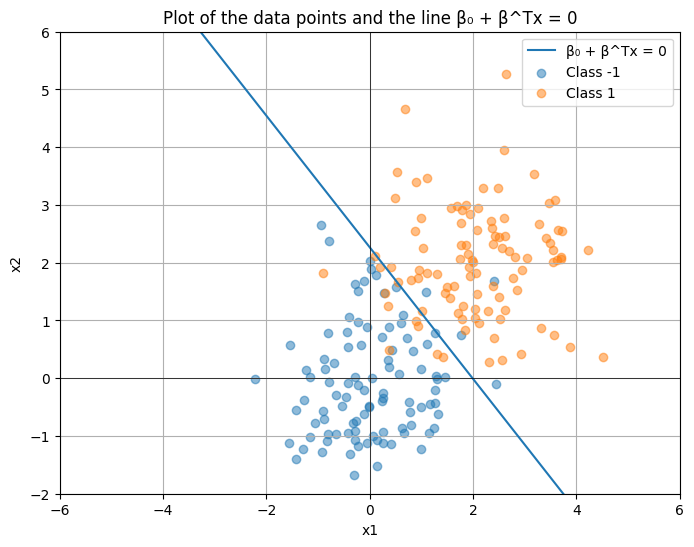

In [32]:
import matplotlib.pyplot as plt

x1_values = np.linspace(-10, 10, 400)
x2_values = -(b_0 + b[0]*x1_values) / b[1]

data1 = pd.read_csv('xy_train.csv', header=None)

x_1 = data1.iloc[:, :-1]
x_2 = data1.iloc[:, -1]

plt.figure(figsize=(8, 6))
plt.plot(x1_values, x2_values, label='β₀ + β^Tx = 0')

for label in np.unique(y):
    plt.scatter(x_1[x_2 == label][0], x_1[x_2 == label][1], label=f'Class {label}', alpha=0.5)


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of the data points and the line β₀ + β^Tx = 0')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-6,6)
plt.ylim(-2,6)
plt.grid(True)
plt.legend()
plt.show()
